#### **Integrating to Prove Archimedes' Principle**


**Calculating the analytical buoyancy of a cylinder**

Below, we provide a Python function that uses Archimedes' principle to calculate the buoyant force on a fully-submerged cylinder of radius $r_c$ and length $L_c$, both in meters. We assume this function is only used for cylinders in water on Earth such that the density is $\rho_w=1000 \text{ kg/m}^3$ and the acceleration due to gravity is $g=-9.81 \text{ m/s}^2$.

In [63]:
# PROVIDED CODE
%reset -f
import numpy as np

def cylBuoyancy(r, L):
  rho_water = 1000  # kg/m^3
  g = -9.81  # m/s^2
  return -np.pi*r**2*L*rho_water*g

radius = 1  # meters
length = 1  # meters

print(f'We have a cylinder of radius {radius} m and length {length} m.')
print(f'The buoyant force is {cylBuoyancy(radius,length):.2f} Newtons.')

We have a cylinder of radius 1 m and length 1 m.
The buoyant force is 30819.02 Newtons.


For this assignment, we will...
* Develop the skill of integrating along a curve
* Visualize the pressure acting on the cylinder
* Attempt to prove Archimedes' principle


**1. Estimating the circumference of a circle with Lagrange interpolation and Gauss-Legendre integration**

In the engineering world, we encounter shapes that are not described by any simple function, such as a complicated airfoil or reentry lifting body. As is the case with airfoils in the [Airfoil Tools](http://airfoiltools.com/airfoil/naca4digit) database, you might only have a set of Cartesian points in space.

For this reason, we will assume we don't actually know that our shape is a circle. Instead, all we know is that we have some shape that follows these points:

$$x = \left[1,\ \frac{\sqrt2}{2},\ 0,\ -\frac{\sqrt2}{2},\ -1,\ -\frac{\sqrt2}{2},\ 0,\ \frac{\sqrt2}{2},\ 1\right] \text{m}$$

$$y = \left[0,\ \frac{\sqrt2}{2},\ 1,\ \frac{\sqrt2}{2},\ 0,\ -\frac{\sqrt2}{2},\ -1,\ -\frac{\sqrt2}{2},\ 0\right] \text{m}$$

These points give us a very nice octagon when interpolated linearly, as seen below.

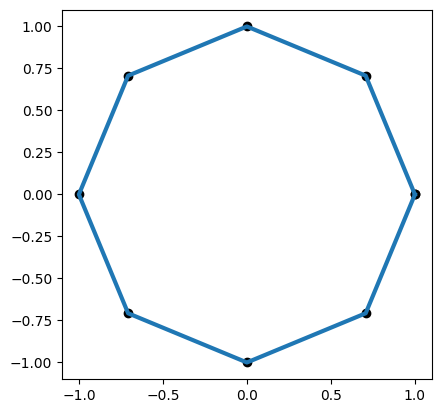

In [64]:
# PROVIDED CODE
import matplotlib.pyplot as plt

# Defining the points as Numpy arrays
sqrt2by2 = np.sqrt(2)/2
x_pts = np.array([1, sqrt2by2, 0, -sqrt2by2, -1, -sqrt2by2, 0, sqrt2by2, 1])
y_pts = np.array([0, sqrt2by2, 1, sqrt2by2, 0, -sqrt2by2, -1, -sqrt2by2, 0])

# Plotting with equally-scaled axes (linear interpolation happens by default)
plt.plot(x_pts,y_pts, linewidth=3)
plt.scatter(x_pts,y_pts,color='k')
ax = plt.gca()
ax.set_aspect('equal')
plt.draw()

Your colleague Bob sees this plot and tells you the real thing is smoother, but Bob does not give you any more points or functions. You want to be computationally efficient and use Gauss-Legendre integration to estimate the circumference, so you decide to fit these points with polynomials, as they work well with Gauss-Legendre.

Since the 8 straight lines are actually interpolations of degree 1 through each pair of points, you decide to improve the fit by using a quadratic polynomial (degree 2) interpolation through each set of 3 points. I.e., you decide to split the octagon into 4 segments and use Lagrange interpolation on each of them. Let's just split it up first.

**1.1. Use a `for` loop to split the octagon into four segments.**
* Split it so there is one segment in each quadrant
* Ensure each segment has only 3 points
* Plot all segments on one plot (each should have its own color by default)
* Show the given points and make the axis scales equal (see previous plot)

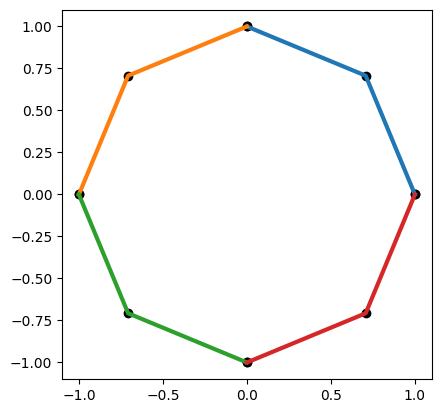

In [65]:
# Part 1.1

# Defining the points as Numpy arrays
sqrt2by2 = np.sqrt(2)/2
x_pts = np.array([1, sqrt2by2, 0, -sqrt2by2, -1, -sqrt2by2, 0, sqrt2by2, 1])
y_pts = np.array([0, sqrt2by2, 1, sqrt2by2, 0, -sqrt2by2, -1, -sqrt2by2, 0])

for i in range(0, 8, 2): #skipping 2 allows us to start at 0, 2, 4, 6
    x_vals = x_pts[i : i+3]
    y_vals = y_pts[i : i+3]
    plt.plot(x_vals, y_vals, linewidth = 3)
    plt.scatter(x_vals, y_vals, color = 'k')

ax = plt.gca()
ax.set_aspect('equal')
plt.draw()

We will integrate along each segment separately. Recall the Gauss-Legendre formula:

$$I = \int_{s_0}^{s_1} F(s)\ ds\ = \int_{-1}^1 F(\rho)J\ d\rho\ \approx\ \sum_{i=1}^nw_i F(\rho_i) J$$

In particular, notice that it requires our bounds of integration to be from $-1$ to $1$. So, in our quadratic Lagrange interpolation, let's use the basis functions for 3 $\rho$ values: $-1$, $0$, and $1$. These are:

$$ N = \left[ \frac{1}{2}\rho(\rho-1), \quad -\rho^2 + 1, \, \quad \frac{1}{2}\rho(\rho+1) \right]$$

**1.2. Plot the quadratic Lagrange interpolation.**

We can map these 3 $\rho$ values to the 3 points in each segment. Remember in Lagrange interpolation that we take the basis functions times their corresponding known function values and sum them to get the interpolation function. Since we want both $x$ and $y$ to be functions of $\rho$ in this interpolation, we will do the same thing here with the known $x_i$ and $y_i$ values we were given at the beginning. Applying Lagrange interpolation, we get:

$$x(\rho)=\sum_{i=0}^2x_iN_i, \qquad y(\rho)=\sum_{i=0}^2y_iN_i$$

For this part:
* Begin by copying your code from part 1.1
* Include the interpolation of each segment within your `for` loop
* Use enough samples of $\rho$ so the plots are smooth
  * The segments *do not* have to connect to each other smoothly; this keeps the math a bit simpler
  * Your plot should look very much like a circle; if it looks like four parabolas stuck together, you likely have not mapped the coordinates correctly

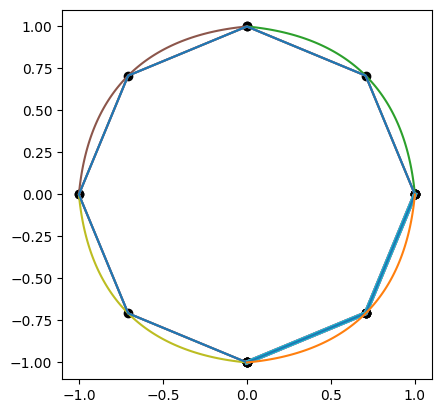

In [66]:
# Part 1.2

for i in range(0, 8, 2): #skipping 2 allows us to start at 0, 2, 4, 6
    xi = x_pts[i : i+3]
    yi = y_pts[i : i+3]

    #plotting quadrant points
    plt.plot(x_vals, y_vals, linewidth = 3)
    plt.scatter(x_vals, y_vals, color = 'k')

    #plotting curve fit
    plotrhos = np.linspace(-1,1,101)  # rhos just for plotting, not Gauss-Legendre
    N = [0.5*plotrhos*(plotrhos-1), -plotrhos**2 + 1, 0.5*plotrhos*(plotrhos+1)]
    
    x_fit = np.dot(xi, N)
    y_fit = np.dot(yi, N)

    plt.scatter(xi, yi, color='k')
    plt.plot(x_pts, y_pts, label='True')  # True quarter circle
    plt.plot(x_fit, y_fit, label='Approx.')

ax = plt.gca()
ax.set_aspect('equal')
plt.draw()

Assuming you have created something that appears more circular, Bob allows us to proceed.

**1.3 Use 2-point Gauss-Legendre to estimate the circumference.**

We can now integrate along each segment and sum the results to get our circumference estimate. Since all we need is the arc length, there is no function to integrate. The integral is simply:

$$I = \int_{s_0}^{s_1}ds\ = \int_{-1}^1J\ d\rho\ \approx\ \sum_{i=1}^nw_iJ $$

where

$$ds = \sqrt{dx^2+dy^2}, \qquad J=\frac{ds}{d\rho}$$

For this part:
* Use the loop again to include all segments in the circumference estimation
* Print the estimate and compare it to the actual circumference
* Note: The actual circumference of this circle is $2\pi \text{ m}$

In [67]:
# Part 1.3

from numpy import pi

num_int_pts = 2  # Use this many integration points for the remainder of this HW
[rhos, w] = np.polynomial.legendre.leggauss(num_int_pts)

integration = 0
for i in range(0, 8, 2): #skipping 2 allows us to start at 0, 2, 4, 6
    xi = x_pts[i : i+3]
    yi = y_pts[i : i+3]

    for i in range(num_int_pts):
        rho = rhos[i]
        N = [0.5*rho*(rho-1),-rho**2 + 1, 0.5*rho*(rho+1)]
        
        dNdr = [rho - 0.5, -2*rho, rho + 0.5]
        dxdr = np.dot(xi, dNdr)
        dydr = np.dot(yi, dNdr)

        jacobian = np.sqrt(dxdr**2 + dydr**2)
        
        integration += w[i] * jacobian

print(f"The estimate of the circumference is {integration:.3f}.")
print(f"True circumference is: {2 * np.pi:.3f}")
print(f"The estimate is {integration /(2 * np.pi) * 100:.3f}% of the true circumference.")

The estimate of the circumference is 6.271.
True circumference is: 6.283
The estimate is 99.800% of the true circumference.


**2. Visualizing pressure distributed on a curve**

Since pressure acts normal to surfaces, arrows are an intuitive choice for visualization. Other situations could use something like a heatmap to show a property like temperature or density.

We want to visualize the pressure acting on our cylinder by using `plt.arrow()`. For the sake of consistency, use these settings for the arrows:

```plt.arrow(base_x, base_y, delta_x, delta_y, color='k', width=0.04, length_includes_head=True)```

Note that `base_x` and `base_y` represent the position of the root of the arrow, and the tip of the arrow will be at `base_x + delta_x` and `base_y + delta_y`. The head of the arrow is included in this length. You may change the color if you wish.

To find the normal vectors we want to plot, we can cross the local tangent vector with the $z$-axis:

$$\vec{n} = \left[ \frac{dx}{d\rho},\  \frac{dy}{d\rho},\ 0 \right] \times \left[ 0,\ 0,\ 1 \right]   $$

The first vector is simply the tangent vector (the slope) at a given point, and the second is a vector coming out of the screen. Crossing these gives us a normal vector to the curve.

**2.1. Find and plot the unit normal vectors at each Gauss-Legendre integration point.**
* Use the same integration points from part 1.3
* Normalize the vectors to make them *unit* normal vectors
* Ensure your arrows point outward from the circle
* Include the fitting functions from part 1.2 in this plot



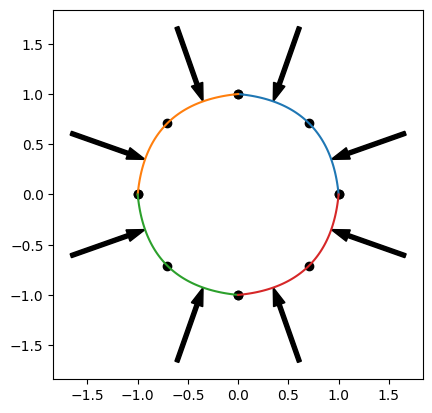

In [68]:
# Part 2.1

num_int_pts = 2  # Use this many integration points for the remainder of this HW
[rhos, w] = np.polynomial.legendre.leggauss(num_int_pts)
z_vec = np.array([0,0,1])

integration = 0
for i in range(0, 8, 2): #skipping 2 allows us to start at 0, 2, 4, 6
    xi = x_pts[i : i+3]
    yi = y_pts[i : i+3]

    #plotting curve fit
    plotrhos = np.linspace(-1,1,101)  # rhos just for plotting, not Gauss-Legendre
    N = [0.5*plotrhos*(plotrhos-1), -plotrhos**2 + 1, 0.5*plotrhos*(plotrhos+1)]
    
    x_fit = np.dot(xi, N)
    y_fit = np.dot(yi, N)

    plt.plot(x_fit, y_fit, label='Approx.')
    plt.scatter(xi, yi, color='k')

    for i in range(num_int_pts):
        rho = rhos[i]
        N = [0.5*rho*(rho-1),-rho**2 + 1, 0.5*rho*(rho+1)]
        dNdr = [rho - 0.5, -2*rho, rho + 0.5]

        x_rho = np.dot(N, xi)
        y_rho = np.dot(N, yi)

        dxdr = np.dot(xi, dNdr)
        dydr = np.dot(yi, dNdr)

        slope_vec = np.array([dxdr, dydr, 0])
        normal_vec = -1 * np.cross(slope_vec, z_vec)

        plt.arrow(x_rho - normal_vec[0], y_rho - normal_vec[1], normal_vec[0], normal_vec[1], color = "k", width = 0.04, length_includes_head = True)

ax = plt.gca()
ax.set_aspect('equal')
plt.draw()

Next, we can visualize the pressure with a few small changes.

**2.2 Calculate and show the pressure at each integration point with an arrow.**
* Assume the *center* of the cylinder is 2 meters underwater
* Normalize the arrows by the maximum pressure
  * This makes the arrows reasonable lengths
  * Note: The max pressure occurs at 3 meters underwater (you can just use this value to normalize)
* Make sure pressure is pointing inward
* Make the tip (the pointy end) of the arrow touch the function

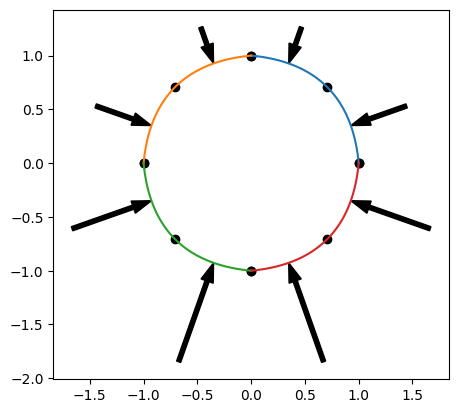

In [69]:
# Part 2.2

def F(h):
    return rho_water * g * h - depth_2m

rho_water = 1000  # kg/m^3
g = 9.81  # m/s^2

#JUST rho*g*h for some useful values
depth_2m = 19620
max_depth = 29430

num_int_pts = 2  # Use this many integration points for the remainder of this HW
[rhos, w] = np.polynomial.legendre.leggauss(num_int_pts)
z_vec = np.array([0,0,1])

integration = 0
for i in range(0, 8, 2): #skipping 2 allows us to start at 0, 2, 4, 6
    xi = x_pts[i : i+3]
    yi = y_pts[i : i+3]

    #plotting curve fit
    plotrhos = np.linspace(-1,1,101)  # rhos just for plotting, not Gauss-Legendre
    N = [0.5*plotrhos*(plotrhos-1), -plotrhos**2 + 1, 0.5*plotrhos*(plotrhos+1)]
    
    x_fit = np.dot(xi, N)
    y_fit = np.dot(yi, N)
    
    plt.plot(x_fit, y_fit, label='Approx.')
    plt.scatter(xi, yi, color='k')

    for i in range(num_int_pts):
        rho = rhos[i]
        N = [0.5*rho*(rho-1),-rho**2 + 1, 0.5*rho*(rho+1)]
        dNdr = [rho - 0.5, -2*rho, rho + 0.5]

        x_rho = np.dot(N, xi)
        y_rho = np.dot(N, yi)

        dxdr = np.dot(xi, dNdr)
        dydr = np.dot(yi, dNdr)

        slope_vec = np.array([dxdr, dydr, 0])
        normal_vec = np.cross(slope_vec, z_vec)
        unit_normal = normal_vec/np.linalg.norm(normal_vec)

        pressure_values = F(y_rho) #just using hydrostatic for the pressure value (scales with y only)
        p_vec = (unit_normal * pressure_values) / max_depth

        plt.arrow(x_rho - p_vec[0], y_rho - p_vec[1], p_vec[0], p_vec[1], color = "k", width = 0.04, length_includes_head = True)

ax = plt.gca()
ax.set_aspect('equal')
plt.draw()

**3. Estimate the net $x$ and $y$ forces on the submerged cylinder.**
* Use the appropriate parts of the code from above
* Recall that the cylinder is $1 \text{ m}$ long
* Show that $x$ (horizontal) forces sum to zero
* Show that $y$ (vertical) forces approximate the buoyant force
  * Note: This is our "proof" of Archimedes' principle

In [70]:
# Part 3

num_int_pts = 2  # Use this many integration points for the remainder of this HW
[rhos, w] = np.polynomial.legendre.leggauss(num_int_pts)
z_vec = np.array([0,0,1])

#instead of one integration, we can integrate each component
x_integration = 0
y_integration = 0
for i in range(0, 8, 2): #skipping 2 allows us to start at 0, 2, 4, 6
    xi = x_pts[i : i+3]
    yi = y_pts[i : i+3]
    
    x_fit = np.dot(xi, N)
    y_fit = np.dot(yi, N)

    for i in range(num_int_pts):
        rho = rhos[i]
        N = [0.5*rho*(rho-1),-rho**2 + 1, 0.5*rho*(rho+1)]
        dNdr = [rho - 0.5, -2*rho, rho + 0.5]

        y_rho = np.dot(N, yi)

        dxdr = np.dot(xi, dNdr)
        dydr = np.dot(yi, dNdr)

        slope_vec = np.array([dxdr, dydr, 0])
        normal_vec = np.cross(slope_vec, z_vec)
        unit_normal = normal_vec/np.linalg.norm(normal_vec)

        pressure_values = F(y_rho)
        p_vec = (unit_normal * pressure_values)

        jacobian = np.sqrt(dxdr**2 + dydr**2)

        #function times the weight times the jacobian where the
        #function is just the components of the pressure vector
        x_integration += p_vec[0] * w[i] * jacobian 
        y_integration += p_vec[1] * w[i] * jacobian 

print(f"The estimated horizontal force is {x_integration} Newtons.")
print(f"The estimated buoyancy force is {y_integration} Newtons.")
print(f"The actual buoyancy force is {cylBuoyancy(1,1):.3f} Newtons.")
print(f"The estimated buoyancy force is {y_integration / cylBuoyancy(1,1) * 100:.3f}% the actual buoyancy force.")

The estimated horizontal force is 0.0 Newtons.
The estimated buoyancy force is 30455.826791680178 Newtons.
The actual buoyancy force is 30819.024 Newtons.
The estimated buoyancy force is 98.822% the actual buoyancy force.
